In [1]:
## From http://cs231n.github.io/neural-networks-case-study/#grad
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
N = 100; D = 2; K =3 ;

In [3]:
X= np.zeros((N*K,D)) # (x,y for our data)
y = np.zeros(N*K, dtype='uint8') # labels
np.linspace(0.0,1,N)

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

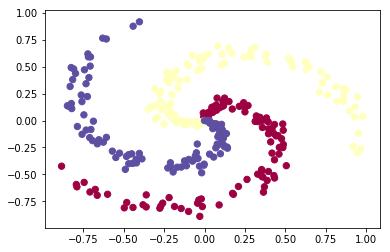

In [4]:
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    radius = np.linspace(0.0,1,N)
    theta = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    X[ix] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Weights and bias

In [5]:
def init_weights():
    W = 0.01 * np.random.randn(D,K)
    W.shape
    b = np.zeros((1,K))
    return (W,b)
    (b.shape, W.shape)


In [6]:
X[1,:]

array([-0.00126046,  0.01002206])

In [9]:
#scores = np.dot(X,W) + b

In [12]:
#f = scores[1] # array of classe scores, unnormalized log probabilities

In [28]:
def class_probs():
    scores = np.dot(X,W) + b
    probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True) # probabilities
    return (scores, probs)
    # np.exp(scores).shape, np.sum(np.exp(scores),axis=1).shape

In [17]:
len(X)

300

# Loss calculation

In [19]:
# Loss
# training_size = len(X)
# probs[range(training_size),y]
# probs[1,y[1]]
# probs[range(4),[0,0,0,1]]


def calc_loss():
    # selects the probability for the correct class
    correct_probs = probs[range(training_size),y] # selects the prob from correct label
    #loss is the average log probs for every training
    data_loss = -np.sum(np.log(correct_probs)) / training_size
    #regularization loss is the sum of the elementwise multiplication of the 2 matrices by reg factor
    reg_loss = 0.5*reg*np.sum(W*W)
#     print ("reg loss %.3f and data loss %.3f" % (reg_loss, data_loss))
    # H = np.array([[1,2,3], [4,5,6]]) ; print(H.shape, type(H), H*H)
    loss = data_loss+reg_loss
    return loss

In [30]:
# Gradients
# Pyi notations denotes prob for lith row. fk is the score for class k
# dL / dfk (loss wrt to class k)
# softmax max the gradient linear with respect to loss
def calc_gradients():
    class_prob = np.zeros((training_size,K))
    class_prob[range(training_size),y] = 1
    dl_dprobs = probs - class_prob
    dscores = dl_dprobs / training_size # loss is the average over all examples
    dW = np.dot(X.T, dscores) # delta on the items
    db = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg = reg*W # reason for having 0.5
    dW += dreg
    return (dW,db)
#     print(db,dreg)




In [21]:
def param_update():
    W = W - step_size*dW
    b = b -  step_size*db
    

# Fit

In [34]:
step_size = 0.9; reg = 0.001; sim_steps = 200

In [35]:
(W,b)=init_weights()
for i in xrange(sim_steps):
    (scores, probs) = class_probs()
    loss = calc_loss()
    (dW, db) = calc_gradients()
    print("iteration %d, loss %f" % (i,loss))
    W += -step_size * dW
    b += -step_size * db
    

iteration 0, loss 1.098511
iteration 1, loss 1.071504
iteration 2, loss 1.047198
iteration 3, loss 1.025289
iteration 4, loss 1.005510
iteration 5, loss 0.987621
iteration 6, loss 0.971413
iteration 7, loss 0.956701
iteration 8, loss 0.943319
iteration 9, loss 0.931124
iteration 10, loss 0.919988
iteration 11, loss 0.909800
iteration 12, loss 0.900460
iteration 13, loss 0.891883
iteration 14, loss 0.883992
iteration 15, loss 0.876718
iteration 16, loss 0.870003
iteration 17, loss 0.863793
iteration 18, loss 0.858040
iteration 19, loss 0.852703
iteration 20, loss 0.847745
iteration 21, loss 0.843132
iteration 22, loss 0.838834
iteration 23, loss 0.834824
iteration 24, loss 0.831078
iteration 25, loss 0.827575
iteration 26, loss 0.824295
iteration 27, loss 0.821220
iteration 28, loss 0.818335
iteration 29, loss 0.815625
iteration 30, loss 0.813076
iteration 31, loss 0.810676
iteration 32, loss 0.808416
iteration 33, loss 0.806284
iteration 34, loss 0.804273
iteration 35, loss 0.802372
it

# Evaluate

In [43]:
scores = np.dot(X,W) + b
evaluated_class = np.argmax(scores, axis = 1)
np.mean(evaluated_class == y)

0.52333333333333332

# with 1 hidden layer

In [46]:
def init_weights(h):
    # h hidden layer size
    W = 0.01 * np.random.randn(D,h)
    W2 = 0.01 * np.random.randn(h,K)
    b = np.zeros((1,h))
    b2 = np.zeros((1,K))
    return (W,b, W2,b2)


In [74]:
(W,b, W2,b2) = init_weights(100)


In [75]:

def forward_pass():
    h_act = np.dot(X,W) + b
    h_act[np.where(h_act <=0)] = 0 # np.maximum
    scores = np.dot(h_act,W2) + b2
    probs = np.exp(scores) / np.sum(np.exp(scores), axis = 1, keepdims = True)
    return (scores, probs, h_act)

In [77]:
def backward_pass():
    dscores = probs 
    dscores[range(training_size),y] -= 1 
    dscores = dscores / training_size # loss is the average over all examples
    dW2 = np.dot(h_act.T, dscores) # delta on the items
    db2 = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg2 = reg*W2 # reason for having 0.5
    dW2 += dreg2
    dhidden = np.dot
    
    return (dW,db)

ValueError: operands could not be broadcast together with shapes (300,100) (300,3) 